### AI/ML Life Cycle
1 - Start

2 - Data Selection - Data will be come from different different sources . it can be DataBase ,Server, Web site , files. and some time CSV File.

3 - Data Description - Then , once we read the data , you will be keep in tha dataframe then you check statistics and story about the dataset . Like How many features present.

4 - Performing Both Statistical and Graphical Data Analysis - We Know EDA(Exploratory Data Analysis) part, statistical analysis checking our data is distributed normally . checking outliers , right skewed , left skewed.

5 - Data Transformation and Derivation of new attributes if necessary - We Just did what data transformation encoding . if there is a need to create a new column we will do that.

6- Selection of Machine Learning algorithms Based on the patterns observed in EDA - You have seen features and labels to do this analysis and all looking in the dataframe we understand that wheather it is regression problem or classification problem based on what we observe within a regression we have lots of algorithm and classification also we have more algorithms and there is a binary classification or multi class feature.

7 - Data Standardization and Normalization - Data standardization we did simply using standard scaler , normalization is very similer to standard scaler.

8 - Creation of train and test data set using optimum parameters - We have to split into train and test data set. using Optimum Parameter .

Optimum Parameter -> Test Size , Random State.

9 - Model Training using the Machine Learning algorithm tested above - After that we started model training by passing x_train,y_train.

10 - Calculation of Model Accuracy Both Training and test Accuracy - Both Training and test accuracies what is the training score and testing score .

If we are not satified with result.

11 - Hyperparameter tuning to achieve better accuracy - If we are not satisfied with the result we try to tune the parameter . that is hyperparameter tuning . to achieve the better accuracy.

12 - Saving the created model file - Once we satisfied with the accuracy then we save our model by using pickle.

13 - Deployment Strategies For The model (Live/Stream/Batch/Mini Batch) - We have to move into production. where real time prediction will be done . So that we have to deploy our model or productionised our model . in deployment strategies when we should push into production we have to discuss with a client .

14 - Production Deployment and Testing - as soon as we move again we are going to testing earlier we are tested in our system now we are going to test live . Checking Prediction accuracy.

15 - Finalizing the Retraining approach - When you build a model or job is not done . you did the model building push into production so that is not the final model . For ever you are not going to use same model . Why ? Because your data is keep changing basically you have to trained new set of data .

16 - Logging and Monitoring (Maintaining the audit tables) - This will taken care by support team or production support . they only made for support only they checking job are running it is producing same result or not they will moniter it . and they will document using tools , and some files and some software . next day manager and Data Scientist will check there is any deviation is there is any problem with a data accuracy. data descriptency and all.

17 - DashBoard for monitoring and Logging Reports - Whatever is monitered here logged here you have to send report to clients okay . Today this is how the data frequency , this is how the data frequency. this is the accuracy how this is behaving . writing in a mail generate some reports . Some dashboards usually this will be taken care by some tableu people.

18 - STOP

## Medical Cost Personal Insurance Datasets
### Problem Statement:
Insurance Forecast by using Regression Algorithms.

Health insurance is a type of insurance that covers medical expenses that arise due to an
illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor
consultation fees. The main purpose of medical insurance is to receive the best medical care without
any strain on your finances. Health insurance plans offer protection against high medical costs. It
covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance
charges, besides many others. Based on certain input features such as age , bmi. ,no of
dependents ,smoker ,region medical insurance is calculated.

#### Columns
• age: age of primary beneficiary

• sex: insurance contractor gender, female, male

• bmi: Body mass index, providing an understanding of body, weights that
are relatively high or low relative to height, objective index of body weight
(kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

• children: Number of children covered by health insurance / Number of
dependents

• smoker: Smoking

• region: the beneficiary's residential area in the US, northeast, southeast,
southwest, northwest.

• charges: Individual medical costs billed by health insurance

#### Predict:
Charges Can you accurately predict insurance costs?

In [1]:
# Data Processing and Cleaning
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [3]:
data=pd.read_csv(r"C:\Users\sharm\Downloads\medical_cost_insurance.csv" )

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### EDA

In [11]:
data.shape

(1338, 7)

In [13]:
#1338=rows
#7=columns

In [15]:
print(data.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [17]:
#There is no null values we are good to proceed

#### Statistical Analysis

In [20]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


As we hvae categorical column(sex, smoker and region) we need to convert into numeric data using encoding method.

### Encoding the data

In [24]:
from sklearn.preprocessing import OrdinalEncoder

In [26]:
# Identify the categorical columns
categorical_columns = ['sex', 'smoker', 'region']

# Initialize the ordinal encoder
encoder = OrdinalEncoder()

# Apply ordinal encoding to the categorical columns
data[categorical_columns] = encoder.fit_transform(data[categorical_columns])

In [28]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


### Visualize the data

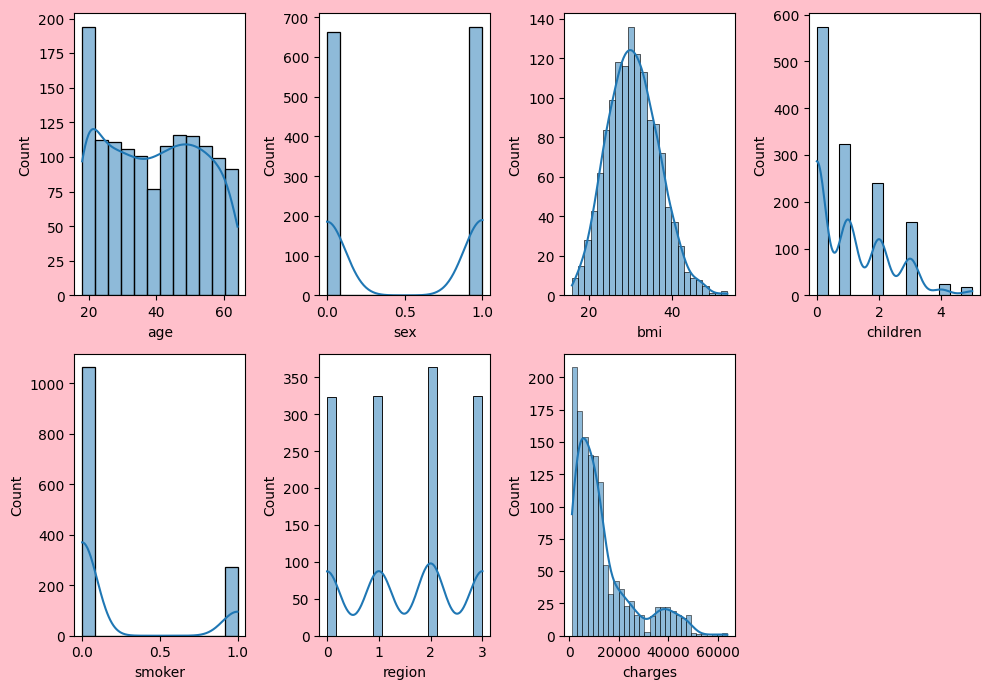

In [31]:
plt.figure(figsize=(10,7),facecolor='pink')
plotnumber=1
for column in data:
  if plotnumber<=7:
        ax=plt.subplot(2,4,plotnumber)
        sns.histplot(data[column], kde=True)
        plt.xlabel(column,fontsize=10)
  plotnumber+=1
plt.tight_layout()

#### Plotting Heatmap (Correaltion Matrix)

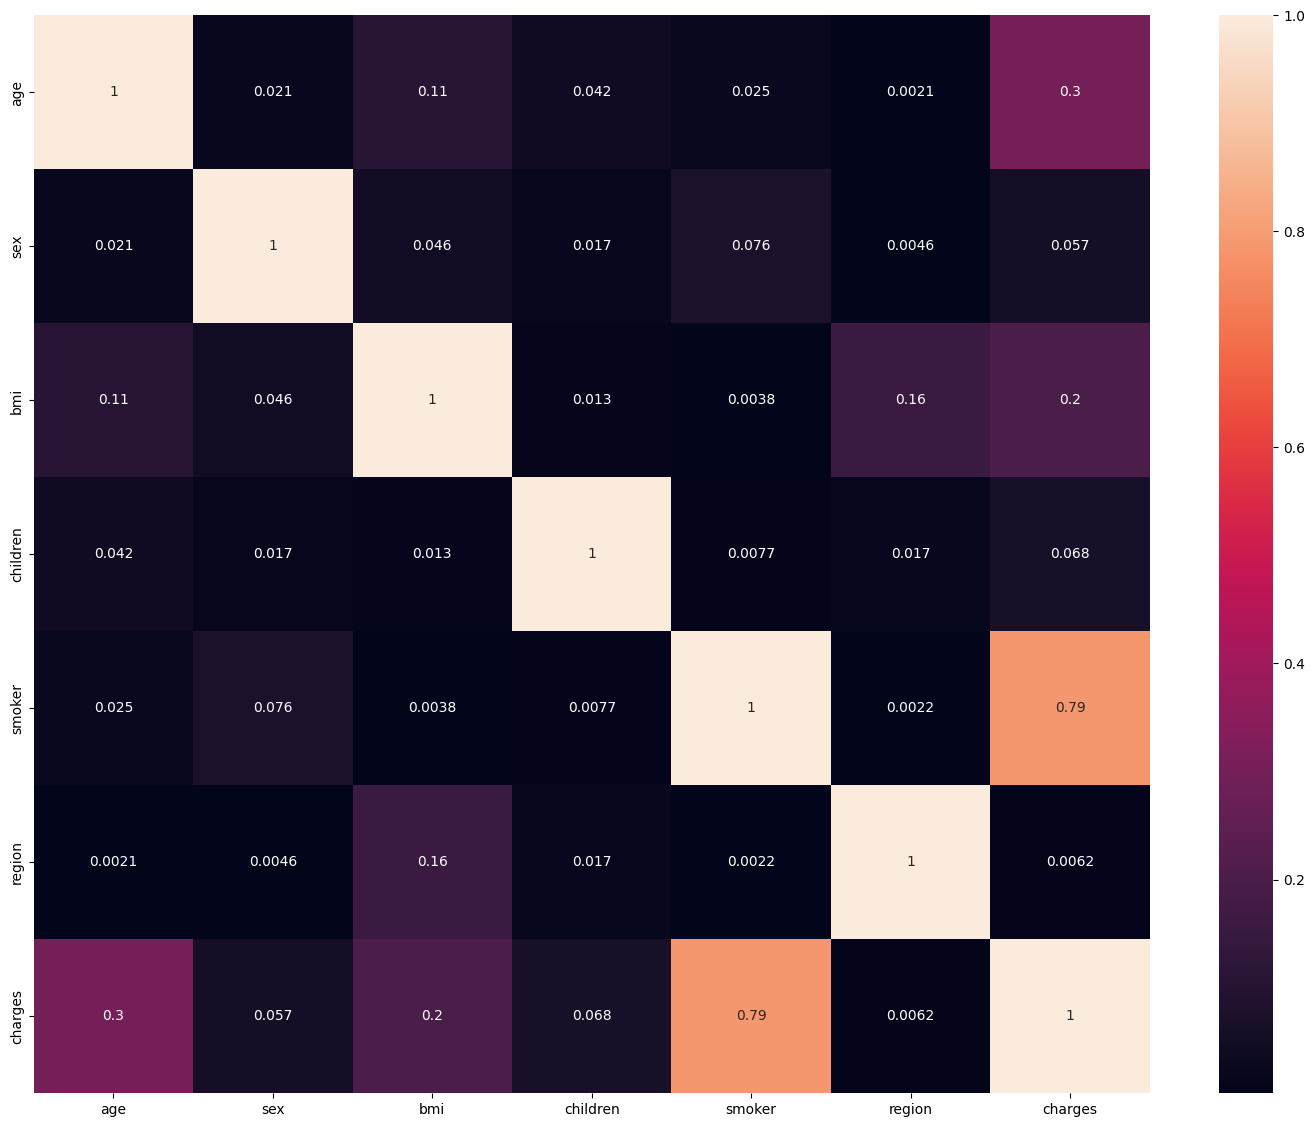

In [34]:
df_corr=data.corr().abs()# (ab But we need proof.solute value)This code will get the coefficient of one varible vs all other variable(Relationship)
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

The correlation between smoker and charges is very high (~0.79). This suggests that whether someone is a smoker has a significant influence on their medical charges.

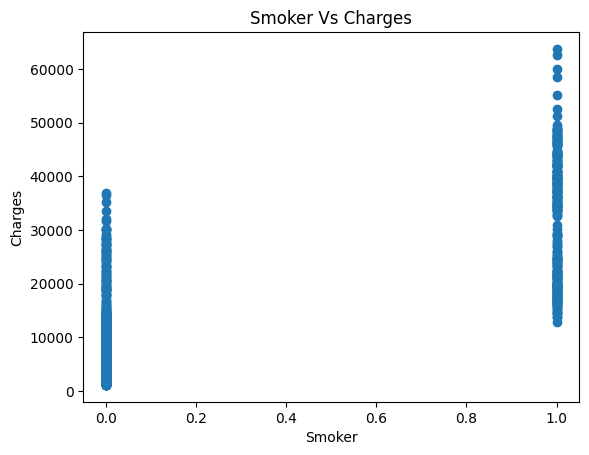

In [37]:
plt.scatter(data.smoker,data.charges)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker Vs Charges')
plt.show()

In [39]:
#they are increasing if one increase so we can remove one of the column

### Train Test Split

--> Training is for learning Purpose

--> Test is for checking Purpose

In [43]:
# Let's prepare the data for modeling by removing the 'Alcohol_content' feature from the predictors and setting 'quality' as the target variable.
# Define features (X) and target (y)
x = data.drop('charges', axis=1)  # All columns except 'charges'
y = data['charges'] 

In [45]:
#Lets split the data into a train test spli
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=94255)

In [47]:
# Create the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_trainscaled = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_testscaled = scaler.transform(x_test)

#### The Variance Inflation Factor (VIF) 
It is used to detect multicollinearity in a regression model. Multicollinearity occurs when two or more independent variables are highly correlated, which can affect the accuracy of the regression coefficients.

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_trainscaled,i) for i in range (x_trainscaled.shape[1])]

vif['Features']=x.columns
#Lets Check the Values 

vif

,vif,Features
0,1.015394,age
1,1.011628,sex
2,1.043048,bmi
3,1.002383,children
4,1.007716,smoker
5,1.027887,region


VIF = 1: No correlation with other variables (no multicollinearity).

1 < VIF < 5: Moderate correlation with other variables. It’s usually acceptable.

VIF > 5: High correlation with other predictors, indicating potential multicollinearity.

VIF > 10: Severe multicollinearity, and you should consider removing or combining variables.

### Model Performance

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr = LinearRegression()
lr.fit(x_trainscaled, y_train)  # Train the model
y_pred_train_lr = lr.predict(x_trainscaled)  # Predict on training data
y_pred_test_lr = lr.predict(x_testscaled)  # Predict on testing data

# Evaluate Linear Regression
print("================== Linear Regression ==================")
print("Training MSE:", mean_squared_error(y_train, y_pred_train_lr))
print("Testing MSE:", mean_squared_error(y_test, y_pred_test_lr))
print("R2 Score:", r2_score(y_test, y_pred_test_lr))

================== Linear Regression ==================
Training MSE: 36564162.78691913
Testing MSE: 36494103.26393123
R2 Score: 0.7518560933250541


The training and testing MSE are similar (around the same value). A R² score of 0.75 indicates that the model explains 75% of the variance in the data, which is reasonable, though not perfect.

In [56]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(x_trainscaled, y_train)  # Train the model
y_pred_train_rf = rf.predict(x_trainscaled)  # Predict on training data
y_pred_test_rf = rf.predict(x_testscaled)  # Predict on testing data

# Evaluate Random Forest
print("================== Random Forest ==================")
print("Training MSE:", mean_squared_error(y_train, y_pred_train_rf))
print("Testing MSE:", mean_squared_error(y_test, y_pred_test_rf))
print("R2 Score:", r2_score(y_test, y_pred_test_rf))

================== Random Forest ==================
Training MSE: 3581197.336447807
Testing MSE: 25280225.46177905
R2 Score: 0.828105547289627


You see a lower training MSE compared to the testing MSE, which is expected because random forests tend to overfit when trained on complex data (lower error on training but higher on testing). However, the R² score of 0.83 is relatively better, indicating that it captures more of the variance in the data compared to linear regression.

In [60]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_trainscaled, y_train)  # Train the model
y_pred_train_dt = dt.predict(x_trainscaled)  # Predict on training data
y_pred_test_dt = dt.predict(x_testscaled)  # Predict on testing data

# Evaluate Decision Tree
print("================== Decision Tree ==================")
print("Training MSE:", mean_squared_error(y_train, y_pred_train_dt))
print("Testing MSE:", mean_squared_error(y_test, y_pred_test_dt))
print("R2 Score:", r2_score(y_test, y_pred_test_dt))

================== Decision Tree ==================
Training MSE: 260554.65921146877
Testing MSE: 56323798.149479814
R2 Score: 0.6170228595424476


You see a lower training MSE compared to the testing MSE, which is expected because decision tree tend to overfit when trained on complex data (lower error on training but higher on testing). However, the R² score of 0.61 is low.

## Model Selection:
Random Forest performs the best overall:

It has the highest R² score (0.828), indicating a better fit for the data.

The Testing MSE is the lowest, which shows that it generalizes better on unseen data compared to the other models.

### HyperParameter Tuning

To perform hyperparameter tuning on a Random Forest model, we can use techniques like GridSearchCV or RandomizedSearchCV from scikit-learn. These methods will search for the optimal hyperparameters for the model.

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

##### Hyperparameters to Tune in Random Forest:
n_estimators: The number of trees in the forest.

max_depth: The maximum depth of the trees.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node.

max_features: The number of features to consider when looking for the best split.

bootstrap: Whether to use bootstrap samples when building trees.

In [74]:
# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],  # Replace 'auto' with valid values
    'bootstrap': [True, False]
}

In [76]:
# Perform GridSearchCV

#Cross-validation (cv=5): The GridSearchCV will perform 5-fold cross-validation to evaluate each combination of parameters.
#scoring='neg_mean_squared_error': This is used to evaluate the model using MSE (negative because GridSearchCV maximizes the score).

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)  

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [113]:
# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [115]:
best_params

{'bootstrap': True,
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300}

In [117]:
# Predict on test data
y_pred = best_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best parameters: {best_params}")
print(f"Test MSE: {mse}")
print(f"Test R²: {r2}")

Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Test MSE: 21820910.84921742
Test R²: 0.8516273704228228


In [89]:
from sklearn.model_selection import cross_val_score

# Assuming `best_rf_model` is your tuned RandomForestRegressor
scores = cross_val_score(best_model, x_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average cross-validation score: {scores.mean()}")

Cross-validation scores: [0.86474861 0.85981016 0.87397294 0.81099222 0.85116351]
Average cross-validation score: 0.8521374897332861


In [93]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get predictions on the test set
y_pred = best_model.predict(x_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

MSE: 21820910.84921742
RMSE: 21820910.84921742
MAE: 2604.747877045416
R²: 0.8516273704228228
